In [2]:
# Import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Display plots within the notebook
%matplotlib inline

In [4]:
data_tr = pd.read_csv("IR_D1_apples.csv", dtype=str, index_col=0)

In [5]:
data_tr.shape

(150, 2201)

In [6]:
data_tr.head()

,Class,0,1,2,3,4,5,6,7,8,...,2190,2191,2192,2193,2194,2195,2196,2197,2198,2199
Sample,,,,,,,,,,,,,,,,,,,,,
1,0,45.04,44.98,44.94,44.85,44.71,44.77666667,44.80333333,44.89,45.01,...,46.83333333,46.86,46.72666667,46.74333333,46.66,46.55,46.48333333,46.44333333,46.62666667,46.70333333
2,0,44.46,44.38,44.26,44.37333333,44.45333333,44.59333333,44.66333333,44.73666667,44.34666667,...,47.06,47.04666667,46.71,46.65,46.6,46.66666667,46.88666667,46.97333333,46.87666667,46.68
3,0,44.46,44.27333333,44.24333333,44.29,44.49666667,44.68333333,44.44666667,44.41666667,44.44,...,46.81666667,46.97666667,46.71,46.75333333,46.60666667,46.47333333,46.43333333,46.48666667,46.6,46.62
4,0,44.13666667,44.21333333,44.22666667,44.17666667,44.08333333,44.07,44.2,44.12666667,44.05666667,...,46.30333333,46.29333333,46.28666667,46.11333333,46.11,46.14,46.19666667,46.28,46.32,46.46333333
5,0,44.70333333,44.89666667,44.86333333,45.05,45.01333333,44.91666667,44.99,45.09666667,44.82333333,...,46.44666667,46.51,46.50333333,46.67333333,46.71333333,46.65,46.35333333,46.19,46.27666667,46.42666667


In [7]:
x = data_tr.values[:, 1:].astype(float)
y = data_tr["Class"].values.astype(int)

from sklearn.model_selection import train_test_split

X_tr, X_ts, y_tr, y_ts = train_test_split(
    x, y, test_size = .1, random_state = 123)

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
z_tr = pca.fit_transform(X_tr)
print(pca.explained_variance_ratio_)

[ 0.96650868  0.02310082]


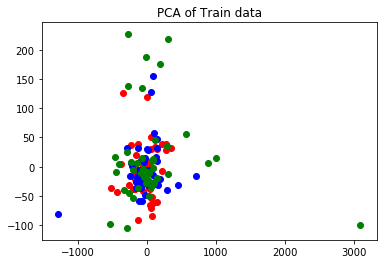

In [10]:
plt.figure()
plt.scatter(z_tr[y_tr == 0, 0], z_tr[y_tr == 0, 1], color="r")
plt.scatter(z_tr[y_tr == 1, 0], z_tr[y_tr == 1, 1], color="b")
plt.scatter(z_tr[y_tr == 2, 0], z_tr[y_tr == 2, 1], color="g")

plt.title("PCA of Train data")
plt.show()

In [9]:
z_ts = pca.transform(X_ts)

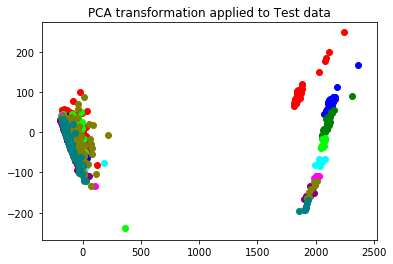

In [10]:
plt.figure()
plt.scatter(z_tr[y_tr == 1, 0], z_tr[y_tr == 1, 1], color="r")
plt.scatter(z_tr[y_tr == 2, 0], z_tr[y_tr == 2, 1], color="b")
plt.scatter(z_tr[y_tr == 10, 0], z_tr[y_tr == 10, 1], color="g")
plt.scatter(z_tr[y_tr == 17, 0], z_tr[y_tr == 17, 1], color="lime")
plt.scatter(z_tr[y_tr == 24, 0], z_tr[y_tr == 24, 1], color="cyan")
plt.scatter(z_tr[y_tr == 32, 0], z_tr[y_tr == 32, 1], color="magenta")
plt.scatter(z_tr[y_tr == 38, 0], z_tr[y_tr == 38, 1], color="purple")
plt.scatter(z_tr[y_tr == 45, 0], z_tr[y_tr == 45, 1], color="olive")
plt.scatter(z_tr[y_tr == 52, 0], z_tr[y_tr == 52, 1], color="teal")
plt.title("PCA transformation applied to Test data")
plt.show()

In [11]:
from sklearn import svm

In [14]:
clf = svm.SVC(C=1,kernel="poly", decision_function_shape='ovo')
clf.fit(X_tr, y_tr)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
y_pred = clf.predict(X_ts)

In [17]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_ts, y_pred)
conf

array([[1, 2, 1],
       [1, 1, 3],
       [1, 5, 0]])

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_ts, y_pred)

0.13333333333333333

In [16]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

N = skf.get_n_splits(X_tr, y_tr)

for i, (idx_tr, idx_ts) in enumerate(skf.split(X_tr, y_tr)):
    print("Fold %d / %d" % (i+1, N))
    X_train, Y_train = X_tr[idx_tr], y_tr[idx_tr]
    X_test, Y_test = X_tr[idx_ts], y_tr[idx_ts]
    print("TRAIN size:", X_train.shape[0])
    print("-- class 1:", np.sum(Y_train==1), "class -1:", np.sum(Y_train==-1))
    print("TEST size:", X_test.shape[0])
    print("-- class 1:", np.sum(Y_test==1), "class -1:", np.sum(Y_test==-1))
    print()

Fold 1 / 5
TRAIN size: 2317
-- class 1: 403 class -1: 0
TEST size: 584
-- class 1: 101 class -1: 0

Fold 2 / 5
TRAIN size: 2319
-- class 1: 403 class -1: 0
TEST size: 582
-- class 1: 101 class -1: 0

Fold 3 / 5
TRAIN size: 2320
-- class 1: 403 class -1: 0
TEST size: 581
-- class 1: 101 class -1: 0

Fold 4 / 5
TRAIN size: 2322
-- class 1: 403 class -1: 0
TEST size: 579
-- class 1: 101 class -1: 0

Fold 5 / 5
TRAIN size: 2326
-- class 1: 404 class -1: 0
TEST size: 575
-- class 1: 100 class -1: 0

